Title : Anomaly Detection

This dataset is a list of 1,000 financial transactions from a bank or similar system. Each row is one transaction, labeled TX0 to TX999. It includes details like:

- **Transaction info**: Amount (mostly $900–$1,100, with a few unusually high like over $2,700), volume (number of transactions), average amount, frequency (how often they happen), and time since the last one (in days).
- **Timing**: Day of the week (e.g., Friday), time of day (e.g., 6:00), to spot patterns.
- **Customer details**: Age (18–64 years), gender (Male or Female), income (varies widely, like $300K–$1.5M), and account type (Savings or Current).

It seems designed to study customer behavior or detect odd transactions, like fraud, but it's just sample data with no real anomalies marked.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('./transaction_anomalies_dataset.csv')
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,6:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,1:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,8:00,56,Female,649457,Savings


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


In [4]:
print(data.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501903   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

In [5]:
print(data.isnull().sum())


Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


Transaction Amount Distribution :

In [6]:
amount_figure = px.histogram(data, x='Transaction_Amount', nbins=20, title='Transaction Amount Distribution')

In [7]:
amount_figure.show()

Distribution of transactions by Account Type : 

In [8]:
box_amount = px.box(data, x = "Account_Type",y = "Transaction_Amount", title = "Transaction Amount by Account Type")

In [9]:
box_amount.show()


<Axes: title={'center': 'Account Type Distribution'}, xlabel='Account_Type'>

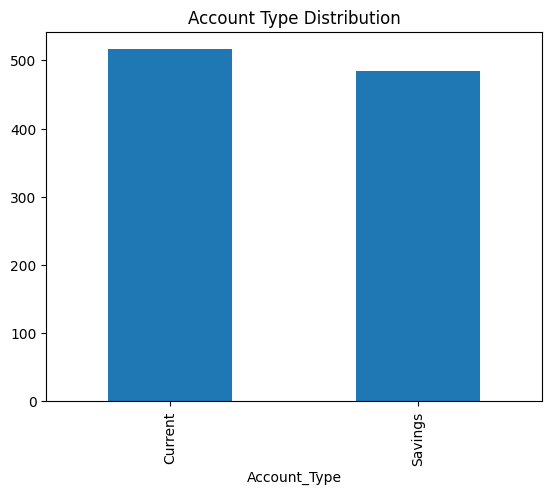

In [10]:
data["Account_Type"].value_counts().plot(kind='bar', title='Account Type Distribution')


Transaction Amount vs Age :

In [11]:
fig_scatter_avg_amount_age = px.scatter(data, x='Age',
                                        y='Average_Transaction_Amount',
                                        color='Account_Type',
                                        title='Average Transaction Amount vs. Age',
                                        trendline='ols')
fig_scatter_avg_amount_age.show()

Transactions by Day of the Week :

In [12]:
fig_day_of_week = px.bar(data, x='Day_of_Week',
                         title='Count of Transactions by Day of the Week')
fig_day_of_week.show()

Correlation Between Columns :

In [14]:
# Correlation Heatmap

numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
fig_corr_heatmap = px.imshow(correlation_matrix,
                             title='Correlation Heatmap')
fig_corr_heatmap.show()

Visualize Anomalies in Data : 

In [15]:
# Calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Scatter plot of Transaction Amount with anomalies highlighted
fig_anomalies = px.scatter(data, x='Transaction_Amount', y='Average_Transaction_Amount',
                           color='Is_Anomaly', title='Anomalies in Transaction Amount')
fig_anomalies.update_traces(marker=dict(size=12), 
                            selector=dict(mode='markers', marker_size=1))
fig_anomalies.show()

Now let’s calculate the number of anomalies in the data to find the ratio of anomalies in the data, which will be useful while using anomaly detection algorithms like isolation forest:

In [16]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


Machine Learning Model :

In [18]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False



1.  **Choose the Data:** We pick three pieces of information to study: the transaction amount, the customer's average amount, and how often they make transactions.
2.  **Separate for Training:** We divide our data into two groups:
    *   One group has the three pieces of information (we call this `X`).
    *   The other group has the "answers" that say if a transaction is normal or fraud (we call this `y`).
3.  **Split the Data:** We take the `X` and `y` groups and split them again:
    *   80% is used to **train** the model.
    *   20% is saved to **test** the model later.
4.  **Create the Model:** We set up the "Isolation Forest" model.
    *   We tell it we expect only about 2% of the data to be fraud.
    *   We set a random seed so the experiment can be repeated exactly.
5.  **Train the Model:** Finally, we teach (or "train") the model using the 80% training data we set aside.

In [19]:
## PERFORMANCE EVALUATION

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [20]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

No anomaly detected: This transaction is normal.


RESULTS :

Enter the value for 'Transaction_Amount': 10000

Enter the value for 'Average_Transaction_Amount': 900

Enter the value for 'Frequency_of_Transactions': 6

Anomaly detected: This transaction is flagged as an anomaly.